In [3]:
#import required libraries
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob
from matplotlib.colors import ListedColormap
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
from osgeo import gdal
from PIL import Image

In [4]:
import os
band_4 =rasterio.open(r'C:\Users\rakho\OneDrive\Desktop\CV_dataset\147-049\2021\B4.TIF')
band_5 =rasterio.open(r'C:\Users\rakho\OneDrive\Desktop\CV_dataset\147-049\2021\B5.TIF')

In [5]:
band_4.height


7801

In [6]:
band_4.width

7641

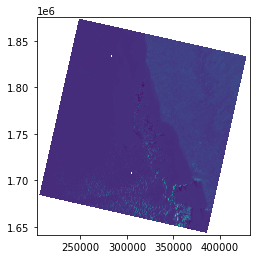

<AxesSubplot:>

In [7]:
plot.show(band_4)

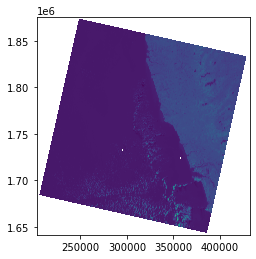

<AxesSubplot:>

In [8]:
plot.show(band_5)

In [9]:
band_4.dtypes[0]


'uint16'

In [10]:
band_4.crs

CRS.from_epsg(32643)

In [11]:
band_4.transform

Affine(30.0, 0.0, 202785.0,
       0.0, -30.0, 1875315.0)

In [12]:
band_4.read(1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

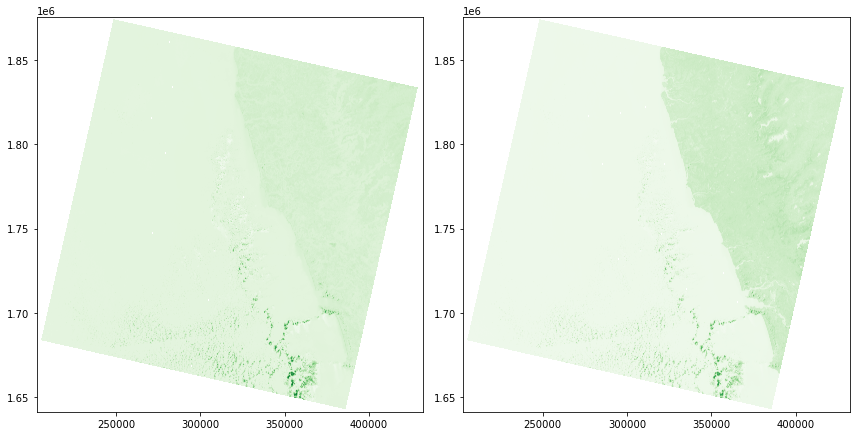

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band_4, ax=ax1, cmap='Greens') #red
plot.show(band_5, ax=ax2, cmap='Greens') #nir
fig.tight_layout()

In [17]:
red = band_4.read(1).astype('float64')
nir = band_5.read(1).astype('float64')

In [18]:
nir

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
ndvi=np.where(
    (nir+red)==0, 
    0, 
    (nir-red)/(nir+red))
ndvi[:,:]

C:\Users\rakho\AppData\Local\Temp\ipykernel_11344\621368648.py:4: RuntimeWarning: invalid value encountered in true_divide
  (nir-red)/(nir+red))


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
ndviImage = rasterio.open(r'C:\Users\rakho\OneDrive\Desktop\CV_dataset\147-049\2021\output1.TIF','w',driver='Gtiff',
                          width=band_4.width, 
                          height = band_4.height, 
                          count=1, crs=band_4.crs, 
                          transform=band_4.transform, 
                          dtype='float64')
ndviImage.write(ndvi,1)
ndviImage.close()

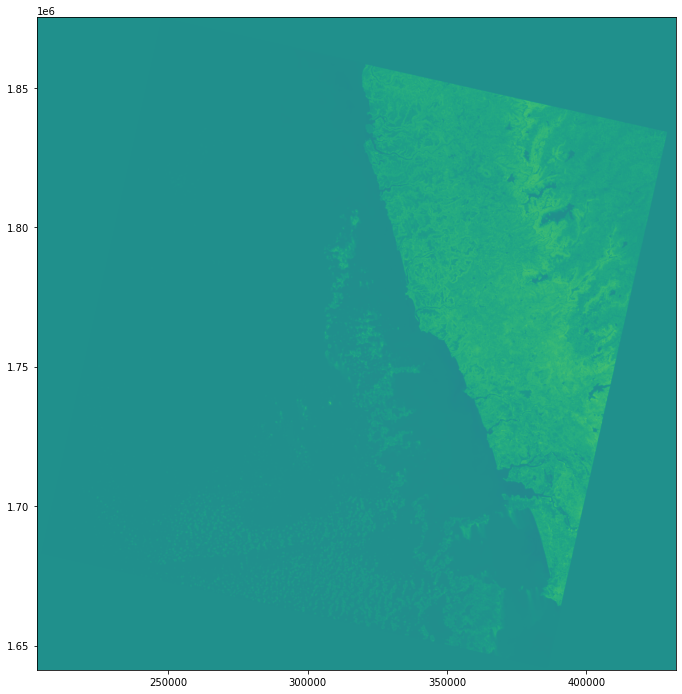

<AxesSubplot:>

In [16]:
ndvi_1 = rasterio.open(r'C:\Users\rakho\OneDrive\Desktop\CV_dataset\147-049\2021\output1.TIF')
fig = plt.figure(figsize=(18,12))
plot.show(ndvi_1)

In [20]:
ndvi_class_bins = [-np.inf, 0, 0.1, 0.25, 0.4, 0.6 ,np.inf]
ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)

# Apply the nodata mask to the newly classified NDVI data
ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_landsat_class
)
np.unique(ndvi_landsat_class)

masked_array(data=[1, 2, 3, 4, 5, 6],
             mask=False,
       fill_value=999999,
            dtype=int64)

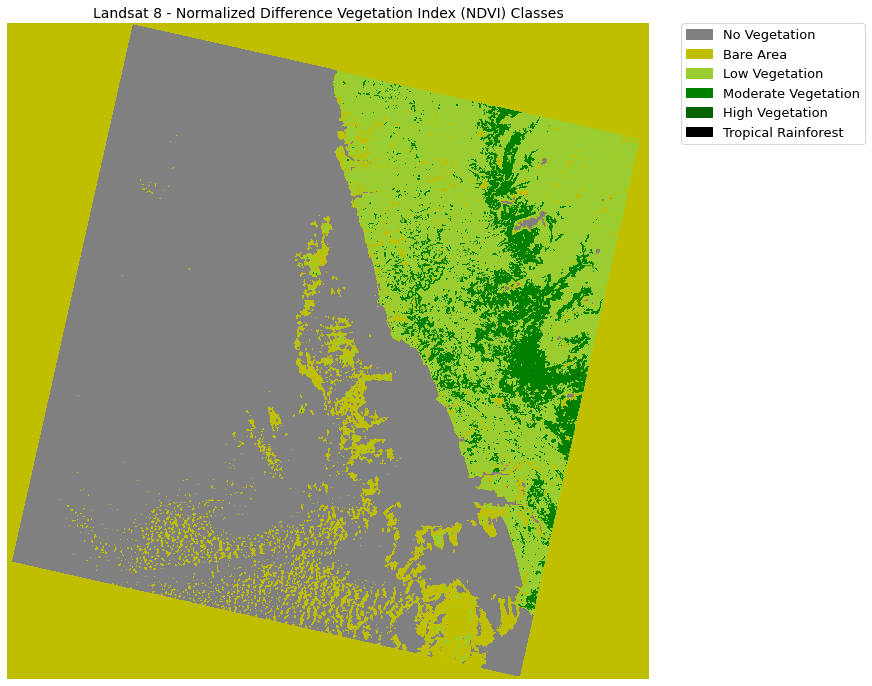

In [22]:
# Define color map
nbr_colors = ["gray", "y", "yellowgreen", "g", "darkgreen","black"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "No Vegetation",
    "Bare Area",
    "Low Vegetation",
    "Moderate Vegetation",
    "High Vegetation",
    "Tropical Rainforest"
]

# Get list of classes
classes = np.unique(ndvi_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:6]

# Plot your data
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)

ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()


In [44]:
print(ndvi.size)

59607441


In [55]:
no_veg = ndvi [ (ndvi >= -1) * (ndvi <= 0)]
print((no_veg.size)*100/(ndvi.size))
res1=(no_veg.size)*100/(ndvi.size)

72.83931548076355


In [56]:
bare_area = ndvi [ (ndvi > 0) * (ndvi <= 0.1)]
print((bare_area.size)*100/(ndvi.size))
res2=(bare_area.size)*100/(ndvi.size)

7.36618268850025


In [57]:
low_veg = ndvi [ (ndvi > 0.1) * (ndvi <= 0.25)]
print((low_veg.size)*100/(ndvi.size))
res3=(low_veg.size)*100/(ndvi.size)

14.431121107849606


In [58]:
mod_veg = ndvi [ (ndvi > 0.25) * (ndvi <= 0.4)]
print((mod_veg.size)*100/(ndvi.size))
res4=(mod_veg.size)*100/(ndvi.size)

5.3363337641017


In [59]:
high_veg = ndvi [ (ndvi > 0.4) * (ndvi <= 0.6)]
print((high_veg.size)*100/(ndvi.size))
res5=(high_veg.size)*100/(ndvi.size)

0.027033537641718255


In [60]:
tropical_veg = ndvi [ (ndvi > 0.6) * (ndvi <= 1)]
print((tropical_veg.size)*100/(ndvi.size))
res6=(tropical_veg.size)*100/(ndvi.size)

1.3421143175732037e-05


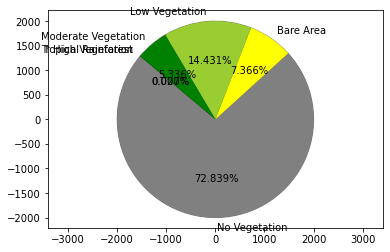

In [82]:
# Data to plot
labels =  ["No Vegetation","Bare Area", "Low Vegetation", "Moderate Vegetation", "High Vegetation",  "Tropical Rainforest"]
sizes = [res1, res2, res3, res4, res5, res6]
colors = ['gray', 'yellow','yellowgreen', 'green','darkgreen', 'black']
explode = (0, 0, 0, 0,0,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%.3f%%', shadow=True, startangle=140,radius=2000,frame=True)

plt.axis('equal')
plt.show()

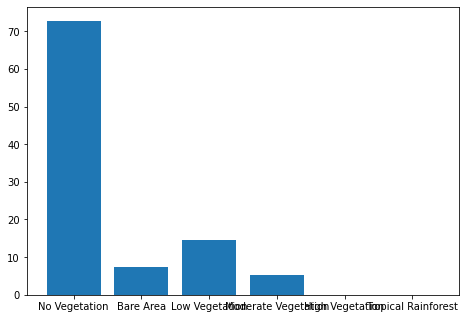

In [85]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ["No Vegetation","Bare Area", "Low Vegetation", "Moderate Vegetation", "High Vegetation",  "Tropical Rainforest"]
val = [res1, res2, res3, res4, res5, res6]
ax.bar(label,val)
fig
plt.show()